<table align="left" style="border-style: hidden" class="table"> <tr><td class="col-md-2"><img style="float" src="http://prob140.org/assets/icon256.png" alt="Prob140 Logo" style="width: 120px;"/></td><td><div align="left"><h3 style="margin-top: 0;">Probability for Data Science</h3><h4 style="margin-top: 20px;">UC Berkeley, Spring 2019</h4><p>Ani Adhikari and Jim Pitman</p>CC BY-NC 4.0</div></td></tr></table><!-- not in pdf -->

In [100]:
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from scipy import stats
from sympy import *
init_printing()
from matplotlib import patches
from mpl_toolkits.mplot3d.axes3d import Axes3D
import ipywidgets as widgets
from ipywidgets import interact

In [101]:
def plot_ellipse(ax, a, b, color, draw_lines=True):
    ax.add_artist(patches.Ellipse((0, 0), 6 * a, 6 * b, color=color,
                                  lw=2, fill=False))
    for x in range(-3, 4):
        ax.plot([-3 * a, 3 * a], [x * b, x * b],
                color='k', lw=1)
        ax.plot([x * a, x * a], [-3 * b, 3 * b],
                color='k', lw=1)

In [102]:
def z_to_v(a, b, n=0, **kwargs):
    m = max(a, b, 1) * 3 + 0.5
    samples = stats.multivariate_normal.rvs(mean=[0, 0], size=n).reshape((n, 2))
    
    def indep_normals(v, w):
        const = 1 / (2 * np.pi * np.abs(a * b))
        return const * np.exp(-0.5*((v / a) ** 2 + (w / b)**2))
    def indep_standard_normals(x,y):
        const = 1 / (2 * np.pi)
        return const * np.exp(-0.5 * (x ** 2 + y **2 ))

    x = np.linspace(-m, m, 100)
    y = np.linspace(-m, m, 100)
    X, Y = np.meshgrid(x, y)

    f1 = np.vectorize(indep_standard_normals)
    f2 = np.vectorize(indep_normals)

    Z1 = f1(X, Y)
    Z2 = f2(X, Y)
    
    def plot(azim):
        fig = plt.figure(figsize=(18, 18))
        ax1 = fig.add_subplot(221, projection='3d')
        ax2 = fig.add_subplot(222, projection='3d')
        ax1.plot_surface(X, Y, Z1, color='blue', **kwargs)
        ax2.plot_surface(X, Y, Z2, color='gold', **kwargs)
        z_max = max(Z1.max(), Z2.max())
        ax1.set_zlim3d(0, z_max) 
        ax2.set_zlim3d(0, z_max)
        ax1.set_title('$\mathbf{Z}$')
        ax1.set_xlabel('$z_1$')
        ax1.set_ylabel('$z_2$')
        ax1.set_zlabel('$f(z_1, z_2)$')
        ax2.set_title('$\mathbf{V}$')
        ax2.set_xlabel('$v_1$')
        ax2.set_ylabel('$v_2$')
        ax2.set_zlabel('$f_V(v_1, v_2)$')
        ax1.view_init(20, azim)
        ax2.view_init(20, azim)
        ax3 = fig.add_subplot(223)
        ax4 = fig.add_subplot(224)
        ax3.set_aspect('equal', 'datalim')
        ax4.set_aspect('equal', 'datalim')
        plot_ellipse(ax3, 1, 1, 'blue')
        ax3.scatter(samples[:, 0], samples[:, 1], s=30)
        ax3.grid(False)
        plot_ellipse(ax4, a, b, 'gold')
        ax4.scatter(samples[:, 0] * a, samples[:, 1] * b, s=30)
        ax3.set_xlim(-m, m)
        ax3.set_ylim(-m, m)
        ax4.set_xlim(-m, m)
        ax4.set_ylim(-m, m)
        ax4.grid(False)
    azimuth_slider = widgets.IntSlider(
        value=-90,
        min=-180,
        max=180,
        step=15,
        description='azimuth',
        continuous_update=False
    )

    @interact(azim=azimuth_slider)
    def wrapper(azim):
        plot(azim)

In [103]:
def unit_square_to_rectangle(a, b):
    plt.axes().set_aspect('equal')
    plt.xlim(-0.1 + min(a, 0), max(a, 1) + 0.1)
    plt.xticks(np.arange(min(a, 0), max(a, 1) + 0.1))
    plt.ylim(-0.1 + min(b, 0), max(b, 1) + 0.1)
    plt.yticks(np.arange(min(b, 0), max(b, 1) + 0.1))
    plt.plot([0, 1], [0, 0], color='k', lw=2)
    plt.plot([0, 0], [0, 1], color='k', lw=2)
    plt.plot([0, 1], [1, 1], color='k', lw=2)
    plt.plot([1, 1], [0, 1], color='k', lw=2)
    plt.plot([0, a], [0, 0], color='gold', lw=2)
    plt.plot([0, 0], [0, b], color='gold', lw=2)
    plt.plot([0, a], [b, b], color='gold', lw=2)
    plt.plot([a, a], [0, b], color='gold', lw=2);

In [104]:
def unit_square_to_parallelogram(a, b):
    plt.axes().set_aspect('equal')
    plt.xlim(-0.1 + min(a, 0), max(a, 1) + 0.1)
    plt.xticks(np.arange(min(a, 0), max(a, 1) + 0.1))
    plt.ylim(-0.1 + min(a + b, 0, a, b), max(a + b, 1, a, b) + 0.1)
    plt.yticks(np.arange(min(a + b, 0, a, b), max(a + b, 1, a, b) + 0.1))
    plt.plot([0, 1], [0, 0], color='k', lw=2)
    plt.plot([0, 0], [0, 1], color='k', lw=2)
    plt.plot([0, 1], [1, 1], color='k', lw=2)
    plt.plot([1, 1], [0, 1], color='k', lw=2)
    plt.plot([0, 1], [0, a], color='red', lw=2)
    plt.plot([0, 0], [0, b], color='red', lw=2)
    plt.plot([1, 1], [a, a + b], color='red', lw=2)
    plt.plot([0, 1], [b, a + b], color='red', lw=2);

In [105]:
def z_to_w(a, b, n=0, **kwargs):
    m = max(3 * (a + b), 4) + 0.5
    samples = stats.multivariate_normal.rvs(mean=[0, 0], size=n).reshape((n, 2))
    cov1 = np.identity(2)
    norm1 = stats.multivariate_normal(cov=cov1)
    cov2 = np.array([[1, a],[a, a ** 2 + b ** 2]])
    norm2 = stats.multivariate_normal(cov=cov2)
    x = np.linspace(-m, m, 100)
    y = np.linspace(-m, m, 100)
    X, Y = np.meshgrid(x, y)
    pos = np.empty(X.shape + (2,))
    pos[:, :, 0] = X
    pos[:, :, 1] = Y
    Z1 = norm1.pdf(pos)
    Z2 = norm2.pdf(pos)
    def plot(azim):
        fig = plt.figure(figsize=(18, 18))
        ax1 = fig.add_subplot(221, projection='3d')
        ax2 = fig.add_subplot(222, projection='3d')
        ax1.plot_surface(X, Y, Z1, color='blue', **kwargs)
        ax2.plot_surface(X, Y, Z2, color='r', **kwargs)
        z_max = max(Z1.max(), Z2.max())
        ax1.set_zlim3d(0, z_max) 
        ax2.set_zlim3d(0, z_max)
        ax1.set_title('$\mathbf{Z}$')
        ax1.set_xlabel('$z_1$')
        ax1.set_ylabel('$z_2$')
        ax1.set_zlabel('$f(z_1, z_2)$')
        ax2.set_title('$\mathbf{W}$')
        ax2.set_xlabel('$w_1$')
        ax2.set_ylabel('$w_2$')
        ax2.set_zlabel('$f_W(w_1, w_2)$')
        ax1.set_xlim(-m, m)
        ax1.set_ylim(-m, m)
        ax2.set_xlim(-m, m)
        ax2.set_ylim(-m, m)
        ax1.view_init(20, azim)
        ax2.view_init(20, azim)
        ax1 = fig.add_subplot(223)
        ax1.set_aspect('equal', 'datalim')
        ax1.set_xlabel('$Z_1$')
        ax1.set_ylabel('$Z_2$')
        ax1.scatter(samples[:, 0], samples[:, 1], s=30)
        plot_ellipse(ax1, 1, 1, 'blue')
        ax2 = fig.add_subplot(224)
        ax2.set_aspect('equal', 'datalim')
        for x in range(-3, 4):
            ax2.plot([-3, 3], [-3 * a + b * x, 3 * a + b * x], color='k', lw=1)
            ax2.plot([x, x], [a * x - 3 * b, a * x + 3 * b], color='k', lw=1)
        radius = 32 / (a ** 2 + b ** 2) ** 0.5
        ax2.scatter(samples[:, 0], a * samples[:, 0] + b * samples[:, 1], s=30)
        ax2.set_xlabel('$W_1$')
        ax2.set_ylabel('$W_2$')
        ax1.set_xlim(-m, m)
        ax1.set_ylim(-m, m)
        ax2.set_xlim(-m, m)
        ax2.set_ylim(-m, m)
        theta = np.linspace(0, 2 * np.pi)
        x = np.cos(theta)
        y = np.sin(theta)
        plt.plot(3 * x, 3 * (a * x + b * y), lw=2, color='r')
    
    azimuth_slider = widgets.IntSlider(
        value=-90,
        min=-180,
        max=180,
        step=15,
        description='azimuth',
        continuous_update=False
    )

    @interact(azim=azimuth_slider)
    def wrapper(azim):
        plot(azim)
        


# Lab 11: Introduction to Jointly Normal Vectors #
The multivariate normal distribution is central to many topics in statistical learning theory. In this lab you will develop the most commonly used formula for the multivariate normal joint density.

The lab is designed as a sequence of small steps that lead you to the joint distribution of linear combinations of independent standard normal variables. That's the multivariate normal distribution. Random variables with this joint distribution are called *jointly normal*. In class we will study the fundamental properties of this joint distribution and its use in multiple linear regression.

The lab is just an introduction to the multivariate normal. It's not intended as a thorough account, and you might have questions at the end of it. Keep a note of your questions. I hope that they will be answered once we study the distribution in class.

**Please make sure you have some paper and a pencil as you do this lab.** It combines algebra, geometry, calculus, linear algebra, and of course probability theory.

What you will learn:
- How to use `SymPy` for linear algebra
- How to find the joint density of a linear transformation of two variables
- How to parametrize the joint density of two independent normal variables so that the formula can easily be extended to handle higher dimensions

Let's get started with a couple of preliminaries. The first one sets up some standard notation for collections of random variables and their moments. The second one examines the form of the normal density function in one dimension.

## Two Dimensions ##
We are used to thinking about a pair of random variables $X$ and $Y$ as a point $(X, Y)$ on the plane. As we move to higher dimensions, it becomes convenient to use matrix representations instead. 

This lab is almost entirely about two dimensions, so the definitions below are about a pair of random variables. All the definitions have obvious extensions to $n$ dimensions for $n > 2$.

### Random Vector ###
We will represent random variables $X_1$ and $X_2$ as a column vector.
$$
\mathbf{X} ~ = ~ 
\begin{bmatrix}
X_1 \\
X_2 \\
\end{bmatrix}
$$

### Mean Vector ###
The *mean vector* of $\mathbf{X}$ is defined as
$$
\boldsymbol{\mu} ~ = ~ 
\begin{bmatrix}
E(X_1) \\
E(X_2) \\
\end{bmatrix}
$$

### Covariance Matrix ###
The *covariance matrix* of $\mathbf{X}$ is the $2\times2$ matrix $\boldsymbol{\Sigma}$ whose $(i, j)$th element is $Cov(X_i, X_j)$. By properties of covariance,

$$
\boldsymbol{\Sigma} ~ = ~ 
\begin{bmatrix}
Var(X_1) & Cov(X_1, X_2) \\
Cov(X_1, X_2) & Var(X_2)
\end{bmatrix}
$$

Every covariance matrix is symmetric, and the elements along its main diagonal are non-negative. Covariance matrices have another property that isn't easy to spot just by looking. As you will soon see in class, there is a relation between $Cov(X_1, X_2)$, $Var(X_1)$, and $Var(X_2)$; the  relation implies that only positive semi-definite matrices can be covariance matrices. But you don't have to worry about that in this lab.

## The Normal Density Function ##
The normal density function can be written in many ways. Let's look at how we have written it thus far. The goal is to help you focus on the most important aspects of the density function without getting caught up in details.

### Quadratic in the Exponent  ###
The normal $(\mu, \sigma^2)$ density has a quadratic expression in the exponent.

$$
f(x) ~ = ~ \frac{1}{\sqrt{2\pi}} e^{-\frac{1}{2} \big{(} \frac{x-\mu}{\sigma} \big{)}^2} ~ = ~ C e^{-\big{[}\frac{1}{2}(ax^2 + bx + c)\big{]}}, ~~~~~~ -\infty < x < \infty
$$

where $C$, $a$, $b$, and $c$ are constants with $a > 0$. 

The quadratic expression $\frac{1}{2}(ax^2 + bx + c)$ determines the shape of the density. As you know, $C$ just makes the density integrate to 1.

If you have a density function and are trying to decide whether it is a normal density, ignore the constants and just look in the exponent. If what you see there is a quadratic, the density is normal. You can work out the mean and SD by methods such as "completing the square", but that algebra exercise is not part of this lab.

### Centering ###
The focus of the lab is on the form of the normal density function and the shape of the density surface of two jointly normal variables. Shifting the variables only affects location, not the shape. So we will start with centered variables, that is, variables with expectation 0. At the end of the lab we will make a straightforward modification for the case of non-zero means. For now, just assume $\mu = 0$, so that

$$
f(x) ~ = ~ Ce^{-\frac{1}{2}ax^2}, ~~~~~~ -\infty < x < \infty
$$

#newpage

## Part 1. Independent Standard Normal Variables ##

Let $Z_1, Z_2$ be i.i.d. standard normal. As you know, their joint density is

$$
f(z_1, z_2) ~ = ~ \frac{1}{2\pi} e^{-\frac{1}{2}(z_1^2 + z_2^2)}, ~~~~~ -\infty < z_1, z_2 < \infty
$$

Notice that the expression in the exponent is quadratic in $z_1$ and $z_2$. It's a particularly simple quadratic – there are no $z_1z_2$, $z_1$, or $z_2$ terms. That is because $Z_1$ and $Z_2$ are independent and in standard units.

In this part of the lab you will learn how to rewrite $f$ using matrices.

### 1a) The Familiar Form ###
Run the cell below. It contains the code used in the textbook to plot $f$. Notice the use of `np.pi` for $\pi$ and `np.exp` for exponentiation.

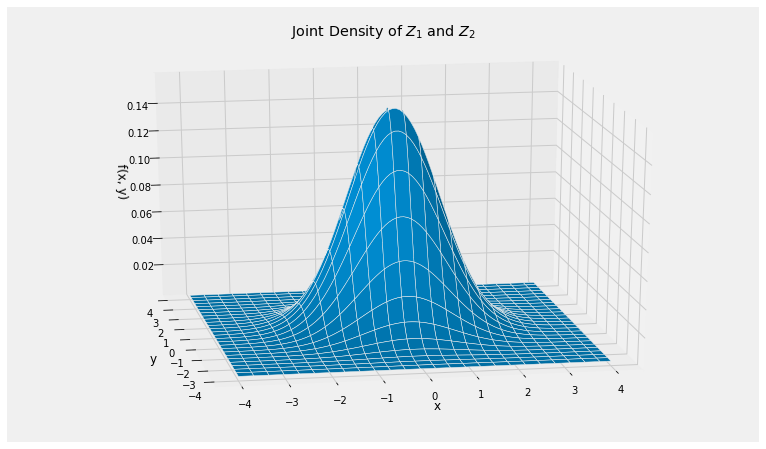

In [106]:
def indep_standard_normals(x, y):
    return 1/(2*np.pi) * np.exp(-0.5*(x**2 + y**2))

Plot_3d((-4, 4), (-4, 4), indep_standard_normals,
        rstride=4, cstride=4)
plt.title('Joint Density of $Z_1$ and $Z_2$');

### 1b) The Joint Density in `SymPy` ###

Recall from a previous lab that you can do symbolic math in Python using `SymPy`. Run the cell below to create two symbols `z_1` and `z_2`.

In [107]:
z_1 = Symbol('z_1')
z_2 = Symbol('z_2')

Construct the `SymPy`expression `f` to have the value $f(z_1, z_2)$ for the joint density $f$ of two i.i.d. standard normal variables. Remember that `SymPy` recognizes `pi` as $\pi$ and `exp(x)` as $e^x$.

In [108]:

# f(z_1, z_2)

f = 1/(2*pi) * exp(-0.5*(z_1**2 + z_2**2))
f

As you saw when you used `SymPy` before, it doesn't always display functions in the way that's most natural for probability theory. That's OK. It happens sometimes when we use symbolic math programs. 

Let `function_name` be a `SymPy` expression involving two symbols `x` and `y`. Recall that you can display the integral of `function_name` over a region in the plane by using:

`Integral(function_name, (x, lower_x, upper_x), (y, lower_y, upper_y))`

where `lower` and `upper` are the lower and upper limits of integration. 

Remember also that `SymPy` uses the symbol `oo` (two lower-case letter o's) for $\infty$ and `-oo` for $-\infty$.

Display the integral of the function $f$ over the entire plane. 

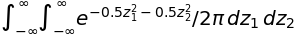

In [109]:

total_integral = Integral(f, (z_1, -oo, oo), (z_2, -oo, oo))
total_integral

Recall that you can compute the value of the definite integral by using `.doit()`. Run the cell below to check that `SymPy` gets the right answer.

In [110]:
total_integral.doit()

### 1c) Matrices in `SymPy` ###
Let
$$
\mathbf{Z} ~ = ~
\begin{bmatrix}
Z_1 \\
Z_2
\end{bmatrix}
$$
and let
$$
\mathbf{z} ~ = ~
\begin{bmatrix}
z_1 \\
z_2
\end{bmatrix}
$$
be a generic value of $\mathbf{Z}$.

Recall the formula for the joint density of $\mathbf{Z}$:

$$
f(z_1, z_2) ~ = ~ \frac{1}{2\pi} e^{-\frac{1}{2}(z_1^2 + z_2^2)}
$$

We will use the notation $\mathbf{M}^T$ for the transpose of a matrix $\mathbf{M}$. It is clear by algebra that

$$
f(\mathbf{z}) 
~ = ~ \frac{1}{(\sqrt{2\pi})^2} \exp(-\frac{1}{2}\mathbf{z}^T \mathbf{z})
$$

Let's see how to calculate $\mathbf{z}^T\mathbf{z}$ in `SymPy`.

The function `Matrix` converts a list into a column matrix. The method `.T` returns the transpose of the matrix.

In [111]:
z = Matrix([z_1, z_2])
z

⎡z₁⎤
⎢  ⎥
⎣z₂⎦

In [112]:
z.T

[z₁  z₂]

Compute $\mathbf{z}^T \mathbf{z}$ in the cell below. The ordinary multiplication symbol `*` works for matrix multiplication in `SymPy`.

In [113]:
z.T*z

⎡  2     2⎤
⎣z₁  + z₂ ⎦

### 1d) The Quadratic and the Covariance Matrix ###
You have now checked in a couple of ways that if the two-dimensional random vector $\mathbf{Z}$ consists of i.i.d. standard normal variables, then the joint density of $\mathbf{Z}$ is

$$
f(\mathbf{z}) 
~ = ~ \frac{1}{(\sqrt{2\pi})^2} \exp(-\frac{1}{2}\mathbf{z}^T \mathbf{z})
$$

The key point to keep in mind:

When $\mathbf{Z}$ is i.i.d. standard normal, **the quadratic in the exponent** is defined as $\frac{1}{2}\mathbf{z}^T\mathbf{z}$ (without the minus sign). That is, the quadratic is half the dot product of the vector $\mathbf{z}$ with itself.

Because $Z_1$ and $Z_2$ are i.i.d. standard normal, the covariance matrix of $\mathbf{Z}$ is the two-dimensional identity matrix $\mathbf{I}_2$, which `SymPy` has chosen to name as follows:

In [114]:
eye(2)

⎡1  0⎤
⎢    ⎥
⎣0  1⎦

After you've stopped laughing, check that `SymPy` gives the right answers for the following. We are using the notation $\det(\mathbf{M})$ for the determinant of $\mathbf{M}$.

(i) $\mathbf{I}_2^{-1}$

(ii) $\det(\mathbf{I}_2)$

(iii) $\mathbf{z}^T \mathbf{I}_2^{-1} \mathbf{z}$

For a `SymPy` matrix `mat`:
- `mat.T` evaluates to the transpose
- `mat.det()` evaluates to the determinant
- `mat.inv()` evaluates to the inverse

In [115]:

# (i)

eye(2).inv()

⎡1  0⎤
⎢    ⎥
⎣0  1⎦

In [116]:

# (ii)

eye(2).det()

In [117]:

# (iii)

z.T*(eye(2).inv())*z

⎡  2     2⎤
⎣z₁  + z₂ ⎦

You showed earlier that we can rewrite the i.i.d. standard normal joint density as

$$
f(\mathbf{z}) 
~ = ~ \frac{1}{(\sqrt{2\pi})^2} \exp(-\frac{1}{2}\mathbf{z}^T \mathbf{z})
$$

Now you can write another equivalent form:

$$
f(\mathbf{z}) 
~ = ~ \frac{1}{(\sqrt{2\pi})^2\sqrt{\det(\mathbf{I}_2)}} \exp(-\frac{1}{2}\mathbf{z}^T \mathbf{I}_2^{-1} \mathbf{z})
$$

We say that $\mathbf{Z}$ is has the **centered bivariate normal distribution with covariance matrix $\mathbf{I}_2$**. 

To see why we complicating matters by throwing in a bunch of silly multiplications by 1, continue with the lab.

#newpage

## Part 2: Changing Units – The Effect on the Quadratic  ###
Let $a$ and $b$ be non-zero constants. Let $V_1 = aZ_1$ and $V_2 = bZ_2$, and let

$$
\mathbf{V} ~ = ~ 
\begin{bmatrix}
V_1 \\
V_2
\end{bmatrix}
$$

Let $f_\mathbf{V}$ be the joint density of $V_1$ and $V_2$. We will say for short that $f_\mathbf{V}$ is the joint density of $\mathbf{V}$.

The goal of this part of the lab is to begin to write the formula for $f_\mathbf{V}$ in terms of matrices and to understand the quadratic component.

Much of the work in this part can be done easily by hand. But setting up the matrix framework in `SymPy`, as you are being asked to do below, will make some of the subsequent parts easier.

### 2a) [ON PAPER] Joint Density of a Linear Transformation ###

We started the lab with the definition 

$$
f(z_1, z_2) ~ = ~ \frac{1}{2\pi} e^{-\frac{1}{2}(z_1^2 + z_2^2)}
$$

By extending the argument for linear change of variable in one dimension, find a formula for $f_{\mathbf{V}}(v_1, v_2)$ in terms of $f$, $a$, $b$ and of course $v_1$ and $v_2$. Be careful – make sure that your density can't be negative.

Explain why your formula works. 

Then fill in the three blanks below. 

$$
f_{\mathbf{V}}(v_1, v_2) ~ = ~ 
f \big{(} \underline{ ~ (i) ~ }, \underline{ ~ (ii) ~ } \big{)} \cdot \frac{1}{\underline{ ~ (iii) ~ }}
$$

### 2b) Image and Preimage ###
We started with non-zero constants $a$ and $b$, the variables $V_1 = aZ_1$ and $V_2 = bZ_2$, and the random vector

$$
\mathbf{V} ~ = ~ 
\begin{bmatrix}
V_1 \\
V_2
\end{bmatrix}
$$

$\mathbf{V}$ is a linear transformation of $\mathbf{Z}$, so $\mathbf{V} = \mathbf{A}\mathbf{Z}$ where $\mathbf{A}$ is a matrix of coefficients.

On the space of possible values, let vectors $\mathbf{z}$ and $\mathbf{v}$ be such that

$$
\mathbf{v} ~ = ~ \mathbf{A}\mathbf{z}
$$

We will call $\mathbf{v}$ the *image* of $\mathbf{z}$ under the linear tranformation by $\mathbf{A}$, and we will call $\mathbf{z}$ the *preimage* of $\mathbf{v}$.

Informally, $\mathbf{z}$ is the point that leads to $\mathbf{v}$ via the linear transformation $\mathbf{A}$.

In this exercise you will establish the relation between the preimage and the quadratic in the exponent. First, run the cell below create some symbols.

In [118]:
a = Symbol('a')
b = Symbol('b')
v_1 = Symbol('v_1')
v_2 = Symbol('v_2')

You can use `Matrix` to create a matrix by rows, providing a list of lists as the argument, as follows. 

Here is a matrix with just one row. Notice the contrast with the way of producing a column.

In [119]:
Matrix([[1,2]]), Matrix([1, 2])

⎛        ⎡1⎤⎞
⎜[1  2], ⎢ ⎥⎟
⎝        ⎣2⎦⎠

In [120]:
Matrix([[1, 2], [3, 4]])

⎡1  2⎤
⎢    ⎥
⎣3  4⎦

Create the matrix $\mathbf{A}$ in `SymPy`. Call it `coeffs` as a reminder that it contains the coefficients of the linear transformation.

In [121]:

coeffs = Matrix([[a, 0], [0, b]])
coeffs

⎡a  0⎤
⎢    ⎥
⎣0  b⎦

Remember that you have already defined
$
\mathbf{z} ~ = ~ 
\begin{bmatrix}
z_1 \\
z_2
\end{bmatrix}
$

Find the image of $\mathbf{z}$. This is a check to see that your definition of `coeffs` is correct.

In [122]:

image_of_z = coeffs*z
image_of_z

⎡a⋅z₁⎤
⎢    ⎥
⎣b⋅z₂⎦

Define
$
\mathbf{v} ~ = ~ 
\begin{bmatrix}
v_1 \\
v_2
\end{bmatrix}
$

In [123]:

v = Matrix([v_1, v_2])
v

⎡v₁⎤
⎢  ⎥
⎣v₂⎦

Find the preimage of $\mathbf{v}$. Make sure your answer is a column vector. You might want to use some scratch paper first.

In [124]:

preimage_of_v = coeffs.inv()*v
preimage_of_v

⎡v₁⎤
⎢──⎥
⎢a ⎥
⎢  ⎥
⎢v₂⎥
⎢──⎥
⎣b ⎦

Find the dot product of this preimage with itself.

In [125]:

preimage_of_v.T*preimage_of_v

⎡  2     2⎤
⎢v₂    v₁ ⎥
⎢─── + ───⎥
⎢  2     2⎥
⎣ b     a ⎦

Go back and look at your answer to **2a**. 

**True or false:**

In the formula for the joint density $f_\mathbf{V}$ at the point $\mathbf{v}$, the quadratic in the exponent is half the dot product of the preimage of $\mathbf{v}$ with itself.


**Your answer here:** TRUE


### 2c) Covariance Matrix of $\mathbf{V}$ ###

Let $\boldsymbol{\Sigma}_\mathbf{V}$ be the covariance matrix of $\mathbf{V}$. In the cell below, define $\boldsymbol{\Sigma}_\mathbf{V}$ in terms of $a$ and $b$.

In [126]:

Sigma_V = Matrix([[a**2, 0] , [0, b**2]])
Sigma_V

⎡ 2    ⎤
⎢a   0 ⎥
⎢      ⎥
⎢     2⎥
⎣0   b ⎦

Find $\boldsymbol{\Sigma}_\mathbf{V}^{-1}$.

In [127]:

Sigma_V.inv()

⎡1     ⎤
⎢──  0 ⎥
⎢ 2    ⎥
⎢a     ⎥
⎢      ⎥
⎢    1 ⎥
⎢0   ──⎥
⎢     2⎥
⎣    b ⎦

Find $\mathbf{v}^T \boldsymbol{\Sigma}_\mathbf{V}^{-1} \mathbf{v}$.

In [128]:

v.T*Sigma_V.inv()*v

⎡  2     2⎤
⎢v₂    v₁ ⎥
⎢─── + ───⎥
⎢  2     2⎥
⎣ b     a ⎦

This shows that in the formula for the joint density of $f_\mathbf{V}$ at the point $\mathbf{v}$, the quadratic in the exponent can be written as

$$
\frac{1}{2} \mathbf{v}^T \boldsymbol{\Sigma}_\mathbf{V}^{-1} \mathbf{v}
$$

This form is useful because it is expressed directly in terms of $\mathbf{v}$ and not the preimage. 

#newpage

## Part 3. Changing Units: The Effect on the Constant of Integration ##
To complete the formula for $f_\mathbf{V}$, we need the constant of integration.

Recall from your linear algebra class that in two dimensions, the determinant of a matrix is the area of the parallelogram formed by the images of the two unit vectors under the transformation by that matrix.

Let's confirm this for the transformation in Part 2.

### 3a) Transformation of the Unit Square ###
Define the two unit vectors. Remember that they should be column vectors.

In [129]:

unit_vector_1 = Matrix([1, 0])
unit_vector_2 = Matrix([0, 1])
unit_vector_1, unit_vector_2

⎛⎡1⎤  ⎡0⎤⎞
⎜⎢ ⎥, ⎢ ⎥⎟
⎝⎣0⎦  ⎣1⎦⎠

Find the images of the unit vectors under the tranformation by `coeffs`.

In [130]:

image_1 = coeffs*unit_vector_1
image_2 = coeffs*unit_vector_2
image_1, image_2

⎛⎡a⎤  ⎡0⎤⎞
⎜⎢ ⎥, ⎢ ⎥⎟
⎝⎣0⎦  ⎣b⎦⎠

Run the cell below to see the unit square and the resulting parallelogram when $a=2$ and $b=3$. For this linear transformation, the parallelogram is a rectangle.. The area of the unit square has gone up by a factor of $ab = 6$.

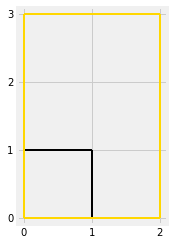

In [131]:
unit_square_to_rectangle(a = 2, b = 3)

Suppose $a=2$ and $b=-3$. Run the cell below. What is the area of the rectangle bounded by the transformed unit vectors? Is $ab$ the correct formula for the area? Write your answer in the subsequent cell.

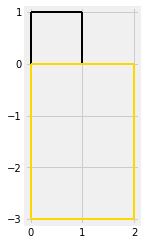

In [132]:
unit_square_to_rectangle(a = 2, b = -3)


**Your answer here**

The area of the rectangle is 6. Hence ab is not the correct formula for the area, rather the absolute value of ab, |ab| is the correct formula

### 3b) [ON PAPER] Two Related Determinants ###
In Part 2 you created the `SymPy` matrix `coeffs` to be the linear transformation in the equation $\mathbf{V} = \mathbf{AZ}$. You also created `Sigma_V` to be the covariance matrix of $\mathbf{V}$.

(i) Calculate $\mathbf{AA}^T$ by hand and show that

$$
\boldsymbol{\Sigma}_\mathbf{V} ~ = ~ \mathbf{AA}^T
$$

(ii) Show that if $\mathbf{z}$ is the preimage of $\mathbf{v}$ then

$$
\mathbf{z}^T\mathbf{z} ~ = ~ \mathbf{v}^T (\mathbf{A^TA})^{-1} \mathbf{v}
~ = ~ \mathbf{v}^T \boldsymbol{\Sigma}_\mathbf{V}^{-1} \mathbf{v}
$$

(iii) Use properties of determinants and the first fact above to explain why $\det(\boldsymbol{\Sigma}_\mathbf{V}) = (\det(\mathbf{A}))^2$.

### 3c) The Determinant of the Covariance Matrix ###

Find $\det(\boldsymbol{\Sigma}_\mathbf{V})$ in the cell below.

In [133]:

Sigma_V.det()

Now look at what you put in Blank (iii) of **2a**, and fill in the blanks below.

I filled Blank (iii) of **2a** with the $\underline{~~~~~~~~~~~~~~~~}$ 
of the determinant of $\mathbf{A}$, which is the same as the 
$\underline{~~~~~~~~~~~~~~~~}$ 
of the determinant of $\boldsymbol{\Sigma_\mathbf{V}}$.


**Your answer here:**
I filled Blank (iii) of 2a with the value of the determinant of A, which is the same is square root of the determinant of sigma_v


### 3d) [ON PAPER] A Reparametrization ###

Your work in Parts 2 and 3 has shown that

$$
f_\mathbf{V}(\mathbf{v}) ~ = ~ \frac{1}{(\sqrt{2\pi})^2 \sqrt{\det(\boldsymbol{\Sigma}_\mathbf{V})} } \exp \big{(} -\frac{1}{2} \mathbf{v}^T \boldsymbol{\Sigma}_\mathbf{V}^{-1} \mathbf{v} \big{)}
$$

The joint density has been expressed in terms of the parameter $\boldsymbol{\Sigma}$, the covariance matrix. We say that $\mathbf{V}$ has the **centered bivariate normal distribution with covariance matrix $\boldsymbol{\Sigma}_\mathbf{V}$**.

Confirm that the formula at the end of Part 1 is a special case of this one.

This way of expressing the joint density in terms of the covariance matrix extends to higher dimensions. The dimension 2 gets replaced by the new dimension $n$, but other than that, the formula remains exactly the same.

### 3e) Visualization ###
Run the cell below to see graphs of $f$ and $f_\mathbf{V}$. As in **3a**, we have set $a=2$ and $b=3$. The bottom left panel shows 10 points picked independently according to $f$. The bottom right panel shows those 10 points transformed to create the corresponding 10 replications from $f_\mathbf{V}$.

As you know, $f$ has circular symmetry: its level sets are circles. Those circles get transformed into ellipses whose axes are along the $v_1$ and $v_2$ axes. That is why the level sets $f_\mathbf{V}$ are ellipses. Move the slider (slowly!) to the right to see the elongated shape.

In [134]:
z_to_v(a=2, b=3, n=10)

interactive(children=(IntSlider(value=-90, continuous_update=False, description='azimuth', max=180, min=-180, …

#newpage

## Part 4: Introducing Dependence ##

Let $Z_1$ and $Z_2$ be i.i.d. standard normal as before. Now let $W_1 = Z_1$ and $W_2 = aZ_1 + bZ_2$. As before, both $a$ and $b$ are non-zero constants. 

Let 
$\mathbf{W} = 
\begin{bmatrix}
W_1 \\
W_2
\end{bmatrix}
$. Our goal is to find the joint density $f_\mathbf{W}$ at the generic point $\mathbf{w} = 
\begin{bmatrix}
w_1 \\
w_2
\end{bmatrix}
$.

### 4a) Marginals and Covariance ###

Are the marginal distributions of $W_1$ and $W_2$ normal? Why or why not?


**Your answer here:**

Yes, both W1 and W1 are normal. W1 = Z1, hence W1 is normal. Also the sum of normal distribution is normal, hence W2 = aZ1 + bZ2, as Z1 and Z2 are normal, W2 is normal

Construct the covariance matrix $\boldsymbol{\Sigma}_\mathbf{W}$ of the random vector $\mathbf{W}$. Use only the symbols `a` and `b`.

In [135]:

Sigma_W = Matrix([[1, a], [a, a**2+b**2]])
Sigma_W

⎡1     a   ⎤
⎢          ⎥
⎢    2    2⎥
⎣a  a  + b ⎦

Could $W_1$ and $W_2$ be independent? Explain your answer.


**Your answer here:**
No, if W1 and W2 were independent, Cov(W1, W2) should be zero, which is not the case. 


### 4b) The Quadratic ###

By the same logic as in **2a**,
$$
f_\mathbf{W}(\mathbf{w}) ~ = ~ Cf(\mathbf{z})
$$
where $\mathbf{z}$ is the preimage of $\mathbf{w}$ and $C$ is a positive constant.

You know that the quadratic in the exponent of $f(\mathbf{z})$ is $\frac{1}{2}\mathbf{z}^T\mathbf{z}$. In this exercise you will express that quadratic in terms of $\mathbf{w}$ and $\boldsymbol{\Sigma}_\mathbf{W}$.

$\mathbf{W} = \mathbf{AZ}$ for some matrix $\mathbf{A}$. Define $\mathbf{A}$ in the cell below; call it `coeffs` as before.

In [136]:

coeffs = Matrix([[1, 0], [a, b]])
coeffs

⎡1  0⎤
⎢    ⎥
⎣a  b⎦

Check that your matrix is correct by finding the image of $\mathbf{z}$ under the transformation by the matrix.

In [137]:

coeffs*z

⎡    z₁     ⎤
⎢           ⎥
⎣a⋅z₁ + b⋅z₂⎦

Now run the cell below to define
$$
\mathbf{w} ~ = ~ 
\begin{bmatrix}
w_1 \\
w_2
\end{bmatrix}
$$

In [138]:
w_1 = Symbol('w_1')
w_2 = Symbol('w_2')

w = Matrix([w_1, w_2])
w

⎡w₁⎤
⎢  ⎥
⎣w₂⎦

Find the preimage of $\mathbf{w}$.

In [139]:

preimage = coeffs.inv()*w
preimage

⎡    w₁     ⎤
⎢           ⎥
⎢  a⋅w₁   w₂⎥
⎢- ──── + ──⎥
⎣   b     b ⎦

Find the dot product of the preimage with itself. The quadratic in the exponent of the joint density function is 1/2 times this dot product. 

In [140]:

preimage_dotproduct = preimage.T*preimage
preimage_dotproduct

⎡                   2⎤
⎢  2   ⎛  a⋅w₁   w₂⎞ ⎥
⎢w₁  + ⎜- ──── + ──⎟ ⎥
⎣      ⎝   b     b ⎠ ⎦

As in Part 2, this dot product is equal to $\mathbf{w}^T \boldsymbol{\Sigma}_\mathbf{W}^{-1} \mathbf{w}$. This expression is called a *quadratic form*. 

To show this, compute the quadratic form and don't worry if it doesn't look like the output of the cell above. Algebraic expressions can be written in many equivalent ways.

In [144]:

quadratic_form = w.T*Sigma_W.inv()*w
quadratic_form

⎡   ⎛            ⎛ 2    2⎞⎞                   ⎤
⎢   ⎜  a⋅w₂   w₁⋅⎝a  + b ⎠⎟      ⎛  a⋅w₁   w₂⎞⎥
⎢w₁⋅⎜- ──── + ────────────⎟ + w₂⋅⎜- ──── + ──⎟⎥
⎢   ⎜    2          2     ⎟      ⎜    2     2⎟⎥
⎣   ⎝   b          b      ⎠      ⎝   b     b ⎠⎦

You saw in an earlier lab that the function `simplify` saves you the trouble of simplifying the algebra. But because there are multiple ways of simplifying algebraic expressions, there are also multiple simplification functions in `SymPy`. 

One such function is `expand`, which does what you expect based on its name: it carries out all the multiplications and collects terms. Run the two cells below and compare the outputs.

In [145]:
expand(preimage_dotproduct)

⎡ 2   2                       2⎤
⎢a ⋅w₁    2⋅a⋅w₁⋅w₂     2   w₂ ⎥
⎢────── - ───────── + w₁  + ───⎥
⎢   2          2              2⎥
⎣  b          b              b ⎦

In [146]:
expand(quadratic_form)

⎡ 2   2                       2⎤
⎢a ⋅w₁    2⋅a⋅w₁⋅w₂     2   w₂ ⎥
⎢────── - ───────── + w₁  + ───⎥
⎢   2          2              2⎥
⎣  b          b              b ⎦

What you have shown thus far is that the joint density of $\mathbf{W}$ is given by
$$
f_\mathbf{W}(\mathbf{w}) ~ = ~ C \exp (-\frac{1}{2} \mathbf{w}^T \boldsymbol{\Sigma}_\mathbf{W}^{-1} \mathbf{w})
$$

### 4c) The Constant of Integration ###
As in Part 3, the constant $C$ has two factors. One factor is $(1/\sqrt{2\pi})^2$. The other is $1/s$ where $s$ is the area of the parallelogram formed by the transformed unit vectors.

Remember that the transformation is determined by the matrix `coeffs`, and that the unit vectors are called `unit_vector_1` and `unit_vector_2`.

In [147]:
coeffs, unit_vector_1, unit_vector_2

⎛⎡1  0⎤  ⎡1⎤  ⎡0⎤⎞
⎜⎢    ⎥, ⎢ ⎥, ⎢ ⎥⎟
⎝⎣a  b⎦  ⎣0⎦  ⎣1⎦⎠

Find the images of the unit vectors under the linear transformation.

In [148]:

image_1 = coeffs*unit_vector_1
image_2 = coeffs*unit_vector_2
image_1, image_2

⎛⎡1⎤  ⎡0⎤⎞
⎜⎢ ⎥, ⎢ ⎥⎟
⎝⎣a⎦  ⎣b⎦⎠

The figure below shows the two image vectors and the resulting parallelogram in the case $a=3$ and $b=2$.

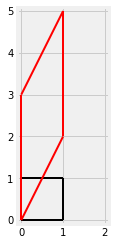

In [149]:
unit_square_to_parallelogram(a = 2, b = 3)

Run the cell below a few times with varying positive values of $a$ and $b$. Notice the geometry of how the parallelogram is formed: how are $a$ and $b$ connected with the vertices?

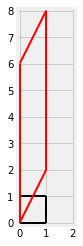

In [159]:
unit_square_to_parallelogram(a = 2, b = 6)

One of the vertices is always $(0, 0)$. In terms of $a$ and $b$, what are the other three vertices? It's fine to assume $a$ and $b$ are both positive, though it is not necessary.


**Your answer here**

other three vertices are (0, b), (1, a), (1, a+b)

Fill in the blanks:

Supppose $a$ and $b$ are both positive. If we define the "base" of the parallelogram to be a vertical side of length b, then the "height" of the red parallelogram is always equal to $\underline{~~~~~~~~}$. Therefore the area of the parallelogram is $\underline{~~~~~~~~}$.


**Your answer here:**

Supppose  𝑎  and  𝑏  are both positive. If we define the "base" of the parallelogram to be a vertical side of length b, then the "height" of the red parallelogram is always equal to 1. Therefore the area of the parallelogram is b.

Use `SymPy` and `Sigma_W` to find $\det(\boldsymbol{\Sigma}_\mathbf{W})$.

In [160]:

Sigma_W.det()

**True or False:** The area of the parallelogram is $\sqrt{\det(\boldsymbol{\Sigma}_\mathbf{W})}$.


**Your answer here:**

TRUE

### 4d) The Joint Density ###
You have shown that $\mathbf{W}$ has the **centered bivariate normal density with covariance matrix $\boldsymbol{\Sigma}_\mathbf{W}$**, given by

$$
f_\mathbf{W}(\mathbf{w}) ~ = ~ \frac{1}{(\sqrt{2\pi})^2 \sqrt{\det(\boldsymbol{\Sigma}_\mathbf{W})} } \exp \big{(} -\frac{1}{2} \mathbf{w}^T \boldsymbol{\Sigma}_\mathbf{W}^{-1} \mathbf{w} \big{)}
$$

Run the cell below for graphs of $f$ and $f_\mathbf{W}$. As before, we have set $a=2$ and $b=3$. Circles get transformed to ellipses as before, but now the axes of the ellipses are at an angle to the $w_1$ and $w_2$ axes.

In [161]:
z_to_w(a=2, b=3, n=10)

interactive(children=(IntSlider(value=-90, continuous_update=False, description='azimuth', max=180, min=-180, …

At this point you should be pretty confident that if we took some other centered linear transformation of $\mathbf{Z}$, it too would have a joint density of the form that we have developed. We will do the general calculation in class. Because you have done this lab, you will quickly understand what the pieces of the general formula mean.

## Endnote: $n$ Dimensions ##
We will discuss the details in class, but here is a summary that should come as no surprise.

Let $\mathbf{X} = 
\begin{bmatrix}
X_1 \\
X_2 \\
\vdots \\
X_n
\end{bmatrix}
$ be a random vector.

- For a symmetric positive definite $n \times n$ matrix $\boldsymbol{\Sigma}$, the random vector $\mathbf{X}$ has the centered multivariate normal distribution with covariance matrix $\boldsymbol{\Sigma}$ if the joint density function is given by

$$
f_{\mathbf{X}}(\mathbf{x}) ~ = ~ \frac{1}{(\sqrt{2\pi})^n \sqrt{\det(\boldsymbol{\Sigma})} } \exp \big{(} -\frac{1}{2} \mathbf{x}^T \boldsymbol{\Sigma}^{-1} \mathbf{x} \big{)}
$$

This is exactly the same as the formula you have developed in this lab, but now $n$ can be greater than 2.

- Multivariate normal variables with mean vector $\boldsymbol{\mu}$ and covariance matrix $\boldsymbol{\Sigma}$ are just $Y_1, Y_2, \ldots, Y_n$ where $Y_i = X_i + \boldsymbol{\mu}[i]$. Shifting doesn't change covariances or volumes. So

$$
f_{\mathbf{Y}}(\mathbf{y}) ~ = ~ f_{\mathbf{X}}(\mathbf{y} - \boldsymbol{\mu})
~ = ~ \frac{1}{(\sqrt{2\pi})^n \sqrt{\det(\boldsymbol{\Sigma})} } \exp \big{(} -\frac{1}{2} (\mathbf{y} - \boldsymbol{\mu})^T \boldsymbol{\Sigma}^{-1} (\mathbf{y} - \boldsymbol{\mu}) \big{)}
$$

We will see that if the joint distribution of a random vector is multivariate normal then all the marginals are normal.

However, we will also see that it is possible to construct a random vector such that all the marginals are normal but the joint density is not multivariate normal.

So "multivariate normal" means more than "all the marginals are normal." In the remainder of the course you will see the main properties of this joint distribution and develop the theory of multiple regression.

## Conclusion ##
You have learned:
- how to use `SymPy` for linear algebra
- the formula for the multivariate normal joint density
- where the pieces of the formula come from
- what the joint density surface looks like in two dimensions
- how the covariance matrix is related to the matrix of coefficients of the linear transformation

## Submission Instructions ##

Many assignments throughout the course will have a written portion and a code portion. Please follow the directions below to properly submit both portions.

### Written Portion ###
*  Scan all the pages into a PDF. You can use any scanner or a phone using applications such as CamScanner. Please **DO NOT** simply take pictures using your phone. 
* Please start a new page for each question. If you have already written multiple questions on the same page, you can crop the image in CamScanner or fold your page over (the old-fashioned way). This helps expedite grading.
* It is your responsibility to check that all the work on all the scanned pages is legible.

### Code Portion ###
* **Save your notebook using File > Save and Checkpoint.**
* Run the cell below to generate a PDF file.
* Download the PDF file and confirm that none of your work is missing or cut off.  If the link leads you to a blank page, use [Command]+[S] or [Ctrl]+[S] to download your work.  

### Submitting ###
* Combine the PDFs from the written and code portions into one PDF.  [Here](https://smallpdf.com/merge-pdf) is a useful tool for doing so.  
* Submit the assignment to Lab 11 on Gradescope.
* **Make sure to assign each page of your pdf to the correct question.**


### **We will not grade assignments which do not have pages selected for each question or were submitted after the deadline.** 

**Congratulations on finishing the last lab of the semester!** 

In [1]:
import gsExport
gsExport.generateSubmission("Lab_11.ipynb")

Processing Lab_11.ipynb
Generated notebook and autograded
Attempting to compile LaTeX
Finished generating PDF
